## Importing all the necessary libraries
##### pandas - for editing,viewing and organising the data
##### matplotlib - for plotting the graphs and animations
##### sklearn - stands for scikit learn ,accuracy score is used to check the accuracy of the program,train test split is used for splitting the data in testing and training , mean squared error displays the error in the features and target

In [13]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

### Importing the Csv file and storing the features in a variable 

In [2]:
data = pd.read_csv('cardio_skyfi.csv')
data.head() # Shows few values of the dataset

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [15]:
data.isnull() #It checks if there is any null value in the dataset

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,False,False,False,False,False,False,False,False,False,False,False,False,False
69996,False,False,False,False,False,False,False,False,False,False,False,False,False
69997,False,False,False,False,False,False,False,False,False,False,False,False,False
69998,False,False,False,False,False,False,False,False,False,False,False,False,False


##### Here since we can see that the 'age' column has inappropriate values ,so we drop that column using the drop function

In [3]:
data = data.drop(['age'],axis=1)

In [4]:
data.describe() # Shows the basic information about the datasets

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
list(data) #It displays the labels of the columns as a list which can be used further 

['id',
 'age',
 'gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'cardio']

### Now we need to check the correlation between every column and the target column where the target column is the 'cardio' column

In [6]:
corr = data.corr('pearson')
corr_matrix = [abs(corr[attr]['cardio']) for attr in list(data)] #For generating correlations value list comprehension is used 
list_obt = list(zip(corr_matrix,list(data))) # Zip function is used to convert all data in tuple
print(list_obt) #displays correlation of the data with the target varible

# Now we need to unzip to obtain two different lists for graph plotting
corr,label = list(zip(*list_obt))
print(corr,label)

[(0.0037993891871983617, 'id'), (0.23815922744232326, 'age'), (0.00810949191312318, 'gender'), (0.010821058331006026, 'height'), (0.1816595617986211, 'weight'), (0.05447505392688467, 'ap_hi'), (0.06571869614919744, 'ap_lo'), (0.22114727391225067, 'cholesterol'), (0.08930688732435302, 'gluc'), (0.015485935661373308, 'smoke'), (0.007330231723206605, 'alco'), (0.03565324811518795, 'active'), (1.0, 'cardio')]
(0.0037993891871983617, 0.23815922744232326, 0.00810949191312318, 0.010821058331006026, 0.1816595617986211, 0.05447505392688467, 0.06571869614919744, 0.22114727391225067, 0.08930688732435302, 0.015485935661373308, 0.007330231723206605, 0.03565324811518795, 1.0) ('id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio')


## Plotting correlations with the target value as a bar graph

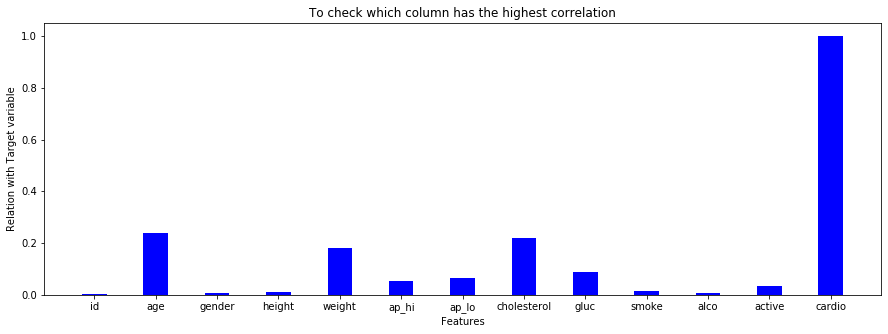

In [7]:
plt.figure(figsize=(15,5))
plt.bar(label,corr,color = "blue",width=0.4) #color sets the color of the graph
plt.xlabel("Features") 
plt.ylabel("Relation with Target variable")
plt.title("To check which column has the highest correlation")
plt.show()

#### Here since no column shows considerable correlation with the target column 'cardio' therefore for testing and training purpose we take all the columns except the last one i.e. 'cardio'

In [8]:
X = data.iloc[:, :-1].values# Get all of the columns except the last column
Y = data.iloc[:, -1].values  # Get only the last column which is the target column

#### Splitting the data for training as well as tor testing purpose

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 6) #Using the inbuilt function
X_train #data before scaling 

array([[8.2903e+04, 1.8365e+04, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [3.2272e+04, 1.7440e+04, 2.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [5.9060e+03, 1.7469e+04, 2.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       ...,
       [3.0634e+04, 1.8049e+04, 2.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [7.1447e+04, 2.1957e+04, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [7.3860e+03, 2.0671e+04, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00]])

#### Scaling the data with the help of inbulit function from sklearn ,so that it lies between 0 and 1

In [10]:
scaling = StandardScaler()
X_train = scaling.fit_transform(X_train)
X_test = scaling.transform(X_test)
X_train # data after scaling ,THIS DATA LOOKS SIMPLE,RIGHT?????

array([[ 1.13886359, -0.4454203 , -0.73462899, ..., -0.31243322,
        -0.23931996,  0.49648558],
       [-0.61689503, -0.81999799,  1.36123134, ..., -0.31243322,
        -0.23931996, -2.01415718],
       [-1.5312031 , -0.80825447,  1.36123134, ..., -0.31243322,
        -0.23931996,  0.49648558],
       ...,
       [-0.67369684, -0.57338413,  1.36123134, ..., -0.31243322,
        -0.23931996,  0.49648558],
       [ 0.74159767,  1.00915598, -0.73462899, ..., -0.31243322,
        -0.23931996, -2.01415718],
       [-1.47988034,  0.48839176, -0.73462899, ..., -0.31243322,
        -0.23931996,  0.49648558]])

## Training the model using RandomForest and performing predictions to check the accuracy score and MSE

In [11]:
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 1)
forest.fit(X_train, Y_train)

predictions=forest.predict(X_test)#Predicting the value of y for a given x

score=accuracy_score(predictions,Y_test) #Checks the accuracy of the model
print(f"The accuracy score is {score}")
# MSE
mse=mean_squared_error(Y_test,predictions) #Checks the squared diff between the predicted and the actual data
print(f"The mean squared error is {mse}")

The accuracy score is 0.7066857142857143
The mean squared error is 0.2933142857142857


## Training the model using SVM and performing predictions to check the accuracy score and MSE

In [14]:
#SAME AS ABOVE BUT HERE WE ARE USING SVM CLASSIFIER TO TRAIN OUR MODEL 
# THESE ARE INBULIT CLASSIFIERS THAT COMES WITH THE SCIKIT LEARN LIBRARY

model = svm.SVC()
model.fit(X_train,Y_train)


predictions=model.predict(X_test)
score=accuracy_score(predictions,Y_test)
print(f"The accuracy score is {score}")

# MSE
mse=mean_squared_error(Y_test,predictions) 
print(f"The mean squared error is {mse}")

#WE SEE THAT SVM HAS A LITTLE MORE ACCURACY THAN RANDONFOREST AND THE MEAN SQUARED ERROR IS ALSO LITTLE LESS IN THIS CASE



The accuracy score is 0.7260571428571428
The mean squared error is 0.27394285714285715


# THANKYOU FOR WATCHING